# Linear Models
## Foundations of Machine Learning
## `! git clone https://github.com/DS3001/linearRegression`

In [ ]:
! git clone https://github.com/vrhughes/linearRegression

Cloning into 'linearRegression'...
remote: Enumerating objects: 52, done.
remote: Counting objects: 100% (22/22), done.
remote: Compressing objects: 100% (18/18), done.
remote: Total 52 (delta 13), reused 5 (delta 4), pack-reused 30 (from 1)
Receiving objects: 100% (52/52), 2.63 MiB | 5.89 MiB/s, done.
Resolving deltas: 100% (15/15), done.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

## Linear Models
- $k$NN and $k$MC illustrate the distinctions between regression and classification, and supervised and unsupervised learning
- In both cases, the number of parameters available for fitting the model is really limited --- just $k$ --- and they offer almost no explanation of their results
- Today we introduce *linear model*, which optimally weight the explanatory variables in order to predict the outcome variable
- These are extremely powerful and easily interpreted tools
- There are a lot of ideas and math in these notes: What's important is that you get exposed to ideas, and get the essential ideas of regression
- You can spend the rest of your life studying regression models (general linear models, quantile regression, kernel regression, etc.): This is an entry-level discussion that focuses on prediction and the intuition/mechanics of Ordinary Least Squares


## Vector Multiplication
- Suppose we have two vectors $x=(x_1,x_2,...x_K)$ and $b=(b_1,b_2,...,b_K)$ of equal length, $K$
- The *dot product* or *inner product* is
$$
x_1 b_1 + x_2 b_2 + ... + x_K b_K
$$

So we multiply the first two entries together, the second two together, and so on, then sum all the terms.
- Common notation for this is:
$$
x \cdot b = x^\top b = x'b = \langle x, b \rangle = \sum_{k=1}^K x_k b_k
$$

## Dot Product and Covariance
- Where have you seen something like this before?
$$ \text{cov}(x,y) = \dfrac{1}{N} \sum_{i=1}^N (x_i - \bar{x})(y_i - \bar{y}) = \dfrac{(x-\bar{x})\cdot(y-\bar{y})}{N}$$
- The covariance is the statistical version of the dot product, centered around the means and scaled to sample size
- The dot product is a general linear algebraic operator, but appears naturally in many places through statistics and computer science, which is why it's worth recognizing and understanding

## Dot Product Example
- Suppose `y = (3,-5,7)` and `x = (2,4,-6)`. How do we compute the dot product in Python?

In [ ]:
import numpy as np

y = (3,-5,7)
x = (2,4,-6)

print( x[0]*y[0] + x[1]*y[1] + x[2]*y[2] )

print( np.inner(x,y), '\n') # Using Numpy

-56
-56 



## Angle and Correlation [math]
- What "is" this thing? It is related to the angle between $x$ and $b$:
$$
\cos(\theta_{xb}) = \dfrac{x \cdot b}{\sqrt{x \cdot x} \  \sqrt{b \cdot b}}
$$
The dot product is the mathematical object that creates *angles* between objects in a space.
- Recall, $\cos( 90^\circ) = \cos(\pi/2) = 0$, so if the dot product between two vectors is zero, they are at a "right angle" to one another, or **orthogonal**
- Where does this show up in statistics? Define $z_x = x - \bar{x}$ and $z_y = y - \bar{y}$. Then the correlation is

\begin{alignat*}{2}
\cos(\theta_{z_x, z_y}) &=& \dfrac{z_x \cdot z_y}{\sqrt{z_x \cdot z_x} \  \sqrt{z_y \cdot z_y}} \\
&=& \dfrac{\sum_{i=1}^N (x_i-\bar{x})(y_i-\bar{y})}{\sqrt{\sum_{i=1}^N (x_i - \bar{x})^2}\sqrt{\sum_{i=1}^N (y_i - \bar{y})^2} }\\
&=& \dfrac{\dfrac{1}{N}\sum_{i=1}^N (x_i-\bar{x})(y_i-\bar{y})}{\sqrt{ \dfrac{1}{N}\sum_{i=1}^N (x_i - \bar{x})^2}\sqrt{\dfrac{1}{N}\sum_{i=1}^N (y_i - \bar{y})^2} }\\
&=& \dfrac{ \text{cov}(x,y)}{\sigma_x \sigma_y}\\
&=& \text{cor}(x,y)
\end{alignat*}

- What does this mean? The sample correlation between two variables is really the angle between them.
- If $\text{cor}(x,y)=0$ it means the two variables are **independent** or **orthogonal** to one another.
- The correlation is at the heart of linear regression: Correlations between variables are roughly what regression coefficients are (namely, $\text{cov}(x,y)/\sigma_x^2$)



---

Angle between two vectors --> are they related or not.

Taking y=x^2 + noise, the covariance is - on the left of 0 and + on the right of 0 so when you average them the covariance is 0, but we still know it has a relationship. So we know it is not a perfect system, however it is very helpful.


---



## Matrix Multiplication
- If you stack rows of observations, you can multiply them all at once as follows:
$$
X \cdot b =  \left[\begin{array}{cccc} x_{11} & x_{12} & \dots & x_{1K} \\ x_{21} & x_{22} & \dots & x_{2K}  \\ \vdots & \vdots & \ddots & \vdots \\ x_{N1} & x_{N2} & \dots & x_{NK} \end{array} \right] \cdot \left( \begin{array}{c} b_1 \\ b_2 \\ \vdots \\ b_K \end{array}\right) = \left( \begin{array}{c} x_1 \cdot b \\ x_2 \cdot b \\ \vdots \\ x_N \cdot b\end{array} \right)
$$
- This is part of the motivation for "clean"/"tidy" data: We do calculations directly on the data frame. Having `NA`'s or ambiguity about what a row or column causes calculations to break down.


## Matrix Multiplication Example
- Suppose
$$ X = \left[ \begin{array}{ccc} 1 & 2 & 3 \\ 4 & 5 & 6 \\ 7 & 8 & 9 \end{array} \right] $$
and
$$ b = \left( \begin{array}{c} 2 \\ 4 \\ 6 \end{array} \right)$$
- What is $X \cdot b$?

In [ ]:
X = np.matrix('1,2,3;4,5,6;7,8,9') # Making a matrix in numpy
print('Matrix X:')
print(X)
b = np.array([2,4,6]) # Making a vector in numpy
print('Vector b:')
print(b)
y = np.matmul(X,b) # Matrix multiplication in numpy
print('X dot b:')
print(y)
y = X @ b # Operator notation
print('X dot b:')
print(y)

Matrix X:
[[1 2 3]
 [4 5 6]
 [7 8 9]]
Vector b:
[2 4 6]
X dot b:
[[ 28  64 100]]
X dot b:
[[ 28  64 100]]


## Linear Models: Setup
- The data include an $N \times K$ data matrix $X$ with $N$ observations and $K$ variables, and an $N$-length vector of outcomes, $y$
- We wish to use $X$ to explain $y$
- In particular, we want to explain $y$ by $X$ with a linear model,
$$
y = X \cdot b
$$
where $b$ is a $K$-length vector of *coefficients* or *weights*
- So for $b = (b_1, b_2, ..., b_K)$, variable $k$ is multiplied by $b_k$ to scale its contribution to the prediction of $y$

## Linear Models: Prediction
- To make a prediction for a new values $\hat{x} = (\hat{x}_1, \hat{x}_2, ..., \hat{x}_L)$, we compute the dot product:
$$
\hat{y} = \hat{x} \cdot b = \hat{x}_1 b_1  + \hat{x}_2 b_2  + ... + \hat{x}_K b_K
$$
- The prediction is the straightforward part: Picking the weights $b$ is the hard part.

## Linear Models: Prediction
- In terms of matrix multiplication, a fitted model is a $\hat{b}$, and the predictions are created for data $\hat{X}$ as
$$
\hat{X} \cdot \hat{b} =  \left[\begin{array}{cccc} \hat{x}_{11} & \hat{x}_{12} & \dots & \hat{x}_{1K} \\ \hat{x}_{21} & \hat{x}_{22} & \dots & \hat{x}_{2K}  \\ \vdots & \vdots & \ddots & \vdots \\ \hat{x}_{N1} & \hat{x}_{N2} & \dots & \hat{x}_{NK} \end{array} \right] \left( \begin{array}{c} \hat{b}_1 \\ \hat{b}_2 \\ \vdots \\ \hat{b}_K \end{array}\right) = \left( \begin{array}{c} \hat{x}_1 \cdot \hat{b} \\ \hat{x}_2 \cdot \hat{b} \\ \vdots \\ \hat{x}_N \cdot \hat{b}\end{array} \right) = \left( \begin{array}{c} \hat{y}_1 \\ \hat{y}_2  \\ \vdots \\ \hat{y}_N \end{array} \right)
$$
- On a compute, these kinds of calulations are fast and efficient, and hardware like GPUs vastly speed up matrix/dot product calculations. Even for very complex models, a linear relationship between variables often appears somewhere (neural networks are non-linear compositions/nests of linear models).
- The next chunk of code gives a visual example of what we're talking about, for a simple model $\hat{y} = b_0 + b_1 x$

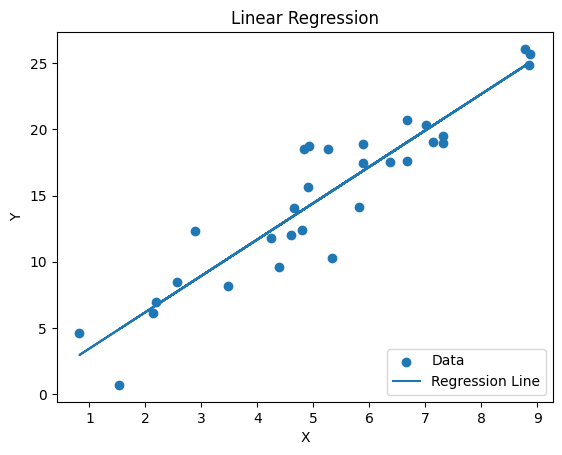

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(500) # Set the seed for the random number generator
N = 30

x = 5 + 2*np.random.normal(0,1,size = N) # Create an x
eps = np.random.normal(0,3,size = N) # Create noise
b0 = -1 # Intercept coefficoent
b1 = 3 # Slope coefficient
y = b0 + b1*x + eps

def slr(x,y): # Single Linear Regression Function
    x_bar = np.mean(x)
    y_bar = np.mean(y)
    b1 = np.inner(x-x_bar,y-y_bar)/np.inner(x-x_bar,x)
    b0 = y_bar - b1*x_bar
    y_hat = b0 + b1*x
    residuals = y - y_hat
    return({'b0':b0,'b1':b1,'y_hat':y_hat,'residuals':residuals})

reg = slr(x,y) # Run the regression

plt.scatter(x,y,label='Data')
plt.plot(x,reg['y_hat'],label='Regression Line')
plt.xlabel("X")
plt.ylabel("Y")
plt.legend(loc='lower right')
plt.title('Linear Regression')
plt.show()

## Case Study: Car Prices
- How does car age predict price?
- I'm going to interactively look at the data, clean outliers, take transformations, and regress, somewhat sloppily, then show you what the picture looks like if you don't do these steps
- This is a practical set of steps to take a
- My rough advice: Linear regressions is defined to approximate the **conditional expectation function** (CEF), $\mathbb{E}[y|x]$. It is "working" if your line is tracking with the average value of $y$ as $x$ varies, and is failing if the line is way off the mark (typically due to 1. outliers or 2. non-linearity of the CEF in $x$, requiring further transformation of the variables)

In [ ]:
import pandas as pd
import seaborn as sns
df = pd.read_csv('/content/linearRegression/data/USA_cars_datasets.csv', low_memory=False) # Load the data
df0 = df # Let's keep the original data around for comparison purposes

In [ ]:
df.head() # Glance at the data

,Unnamed: 0,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition
0,0,6300,toyota,cruiser,2008,clean vehicle,274117,black,jtezu11f88k007763,159348797,new jersey,usa,10 days left
1,1,2899,ford,se,2011,clean vehicle,190552,silver,2fmdk3gc4bbb02217,166951262,tennessee,usa,6 days left
2,2,5350,dodge,mpv,2018,clean vehicle,39590,silver,3c4pdcgg5jt346413,167655728,georgia,usa,2 days left
3,3,25000,ford,door,2014,clean vehicle,64146,blue,1ftfw1et4efc23745,167753855,virginia,usa,22 hours left
4,4,27700,chevrolet,1500,2018,clean vehicle,6654,red,3gcpcrec2jg473991,167763266,florida,usa,22 hours left


<Axes: >

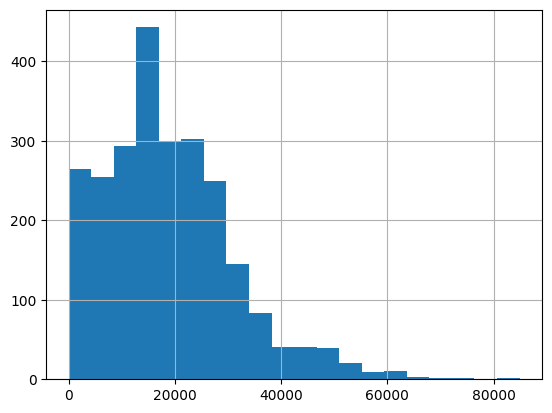

In [ ]:
df['price'].hist(bins=20)

<Axes: >

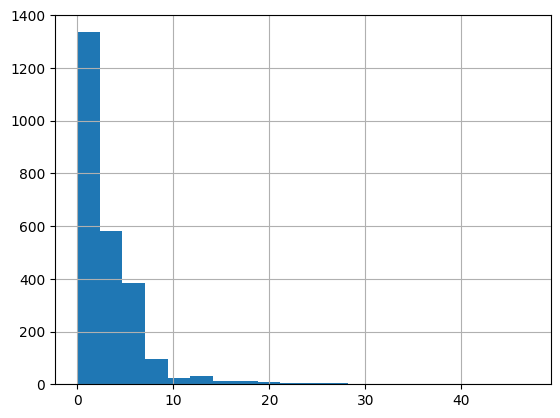

In [ ]:
df['age'] = max(df['year'])-df['year'] # Convert year to age
df['age'].hist(bins=20)

<Axes: xlabel='age', ylabel='price'>

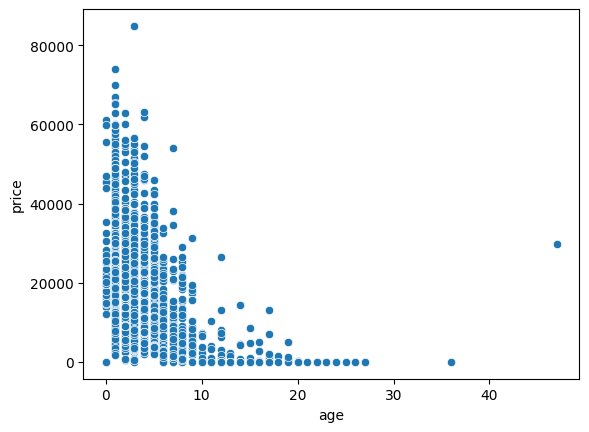

In [ ]:
sns.scatterplot(data=df,y='price',x='age') # We've got some outliers here

<Axes: xlabel='age_ihs', ylabel='price_ihs'>

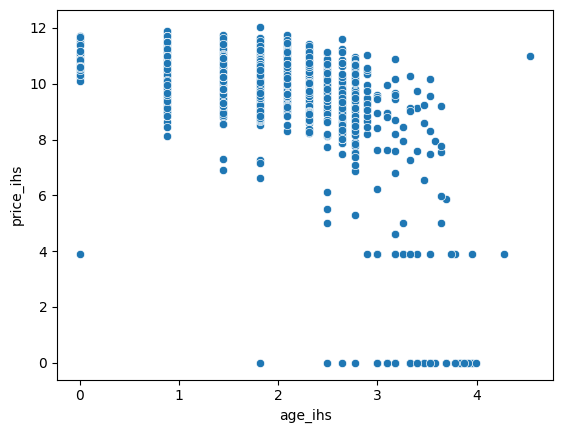

In [ ]:
# Take arcsinh transformation to rescale the variables
df['price_ihs'] = np.arcsinh(df['price'])
df['age_ihs'] = np.arcsinh(df['age'])
sns.scatterplot(data=df,y='price_ihs',x='age_ihs') # We've got some outliers here

<Axes: >

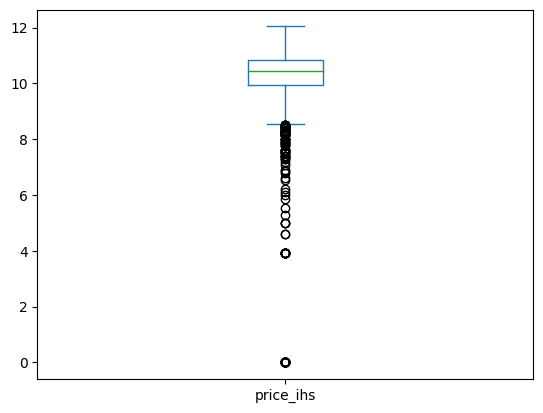

In [ ]:
df['price_ihs'].plot.box() # Outliers below 9

<Axes: >

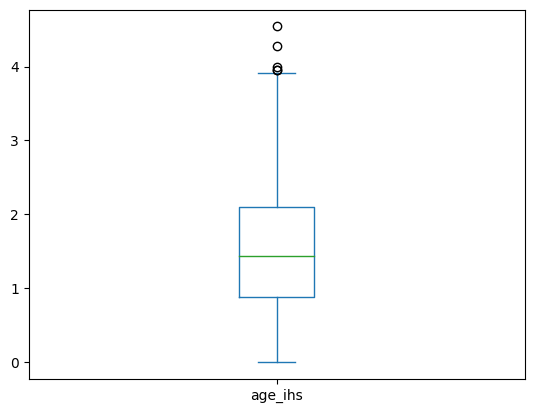

In [ ]:
df['age_ihs'].plot.box() # Outliers above 4

In [ ]:
# Drop outliers:
df = df.loc[df['price_ihs']>9,:]
df = df.loc[df['age_ihs']<4,:]

<Axes: xlabel='age_ihs', ylabel='price_ihs'>

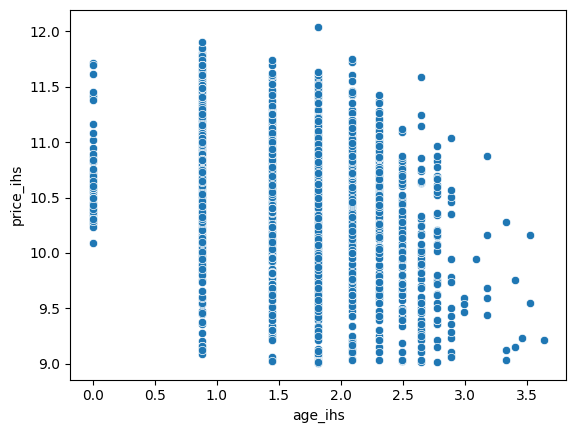

In [ ]:
sns.scatterplot(data=df,y='price_ihs',x='age_ihs')

---

Inv hyperbolic sine is an upgrade to the log function

---

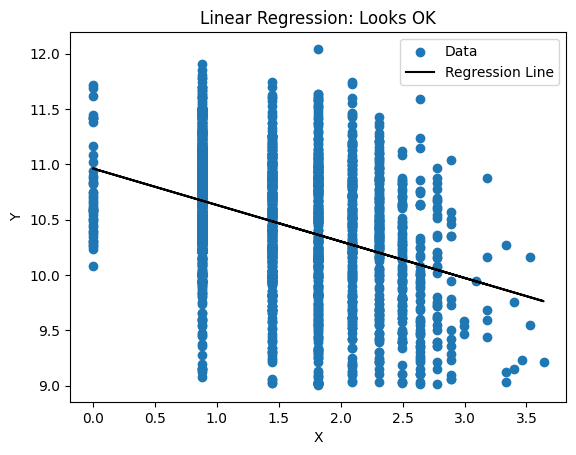

In [ ]:
x = df['age_ihs']
y = df['price_ihs']

coef = slr(x,y)

y_hat = coef['b0']+coef['b1']*x
plt.scatter(x,y,label='Data')
plt.plot(x,y_hat,label='Regression Line',color='black')
plt.xlabel("X")
plt.ylabel("Y")
plt.legend(loc='upper right')
plt.title('Linear Regression: Looks OK')

plt.show()

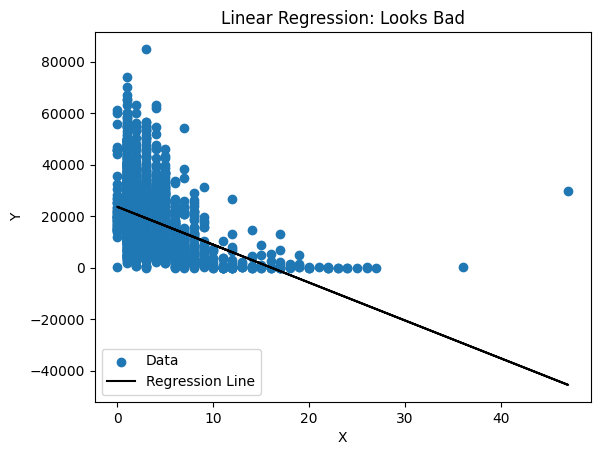

In [ ]:
# Why bother with all that data cleaning?
x = df0['age']
y = df0['price']

coef = slr(x,y)

y_hat = coef['b0']+coef['b1']*x
plt.scatter(x,y,label='Data')
plt.plot(x,y_hat,label='Regression Line',color='black')
plt.xlabel("X")
plt.ylabel("Y")
plt.legend(loc='lower left')
plt.title('Linear Regression: Looks Bad')

plt.show()

---

This is bad, half of the trend line is below 0..... car can't be worth -23000 dollars

---

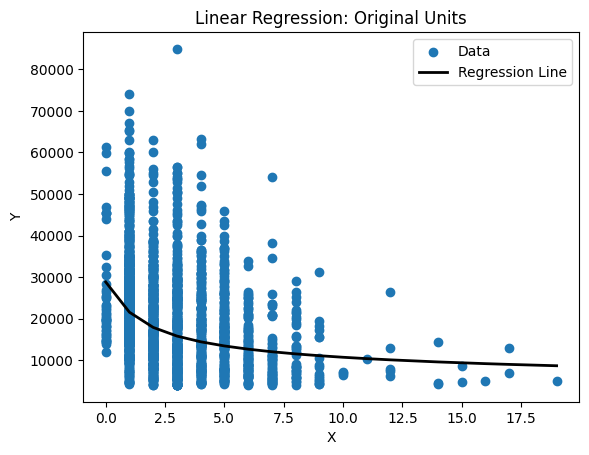

In [ ]:
df.sort_values('age',inplace=True) # Sorts the data by age of car

x = df['age']
y = df['price']
coef = slr( df['age_ihs'], df['price_ihs'])
y_hat = np.sinh(coef['b0']+coef['b1']*df['age_ihs']) # sinh is the inverse of arcsinh

plt.scatter(x,y,label='Data')
plt.plot(x,y_hat,label='Regression Line',color='black',linewidth=2)
plt.xlabel("X")
plt.ylabel("Y")
plt.legend(loc='upper right')
plt.title('Linear Regression: Original Units')

plt.show()

## Examples
- Predict car prices from attributes
- Predict Airbnb rental prices from housing features
- Predict probability of heart failure from patient characteristics
- Predict bond and sentence from defendant demographics and criminal record
- Predict student loan debt creation as a function of institution characteristics


## Errors/Residuals
- Fitting a linear model is based on minimizing the unexplained variation in the data
- Let $\hat{y}_i = x_i \cdot b$ be the prediction for observation $i$
- The *residual* or *error* for observation $i$ is
$$
e_i = y_i - \hat{y}_i = y_i - x_i \cdot b
$$
This is how far off the in-sample prediction is, using the coefficients $b$ and variables $x_i$ for observation $i$ to make a prediction $\hat{y}_i$ --- how bad is our model at predicting values for data we already have?

## Sum-of-Squared-Error, `SSE`
- Some errors will generally be positive and some negative, but we want to count any error as undesirable, and larger errors as even worse failures. So, we square the error,
$$
e_i^2 = (y_i - \hat{y}_i)^2
$$
and sum over the observations,
$$
\text{SSE} = \sum_{i=1}^N e_i^2 = \sum_{i=1}^N (y_i - \hat{y}_i)^2
$$
to get the **Sum of Squared Error**.
- This is often normalized as an average, to get the **mean squared error**,
$$
\text{MSE} = \dfrac{1}{N} \sum_{i=1}^N (y_i - \hat{y}_i)^2,
$$
and often further normalized by taking the square root to get the **root mean square error**
$$
\text{RMSE} = \sqrt{ \dfrac{1}{N} \sum_{i=1}^N (y_i - \hat{y}_i)^2}.
$$
- From a stats perspective there are subtle differences, but from a model-fitting perspective, these are all fundamentally the same thing: A metric of model performance based on squared error

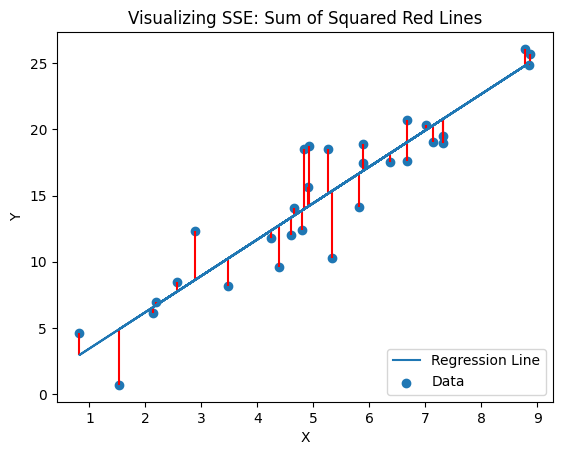

In [ ]:
# The sum of the squares of the red lines is the SSE:
np.random.seed(500) # Set the seed for the random number generator
N = 30
x = 5 + 2*np.random.normal(0,1,size = N) # Create an x
eps = np.random.normal(0,3,size = N) # Create noise
b0 = -1 # Intercept coefficoent
b1 = 3 # Slope coefficient
y = b0 + b1*x + eps
reg = slr(x,y) # Run the regression
for i in range(len(x)):
    plt.vlines(x[i], y[i], reg['y_hat'][i], color='r') # Visualize residuals
plt.plot(x,reg['y_hat'],label='Regression Line')
plt.scatter(x,y,label='Data')
plt.xlabel("X")
plt.ylabel("Y")
plt.legend(loc='lower right')
plt.title('Visualizing SSE: Sum of Squared Red Lines')
plt.show()

## Other Model Metrics
- There is no reason you can't target other measures of model performance, like **mean absolute deviation** which is more robust to outliers,
$$ \text{MAD} = \dfrac{1}{N} \sum_{i=1}^N |y_i - \hat{y}_i|$$
or **worst absolute deviation** where worst-case prediction is the concern,
$$ \text{WAD} = \max_i |y_i - \hat{y}_i|$$
- There are (at least) hundreds of different metrics of model success besides `SSE`
- Why `SSE`? Probably because we can easily use calculus to minimize it.

## Minimizing the `SSE`
- The goal of *linear regression* is to pick $b$ to make $\text{SSE}(b)$ as small as possible.
- Let's do this for a *single linear model* with a constant and one explanatory/feature variable $x_i$:
$$
y_i = b_0 \times 1 + b_1 \times x_i
$$
- Then the `SSE` is:
$$
\text{SSE}(b_0, b_1) = \sum_{i=1}^N (y_i - b_0 - b_1 x_i)^2
$$


## Optimization
- From my perpsective, the main reason to study calculus is to learn how to minimize/maximize and approximate functions
- To do interesting things in quantitative subjects, you typically need the mathematical background to maximize or minimize things like $\text{SSE}$ with respsect to $b_0$ and $b_1$
- Roughly, to minimize a function $f(b)$, you take the derivative with respect to $b$, $f'(b)$, set it equal to zero, and solve for $b^*$ --- this is called a *first order necessary condition*

## First-Order Conditions for Optimization
- If $\text{SSE}(b_0,b_1) = \sum_{i=1}^N(y_i-b_0 - b_1x_i)^2$, the necessary condition for $b_0$ is
$$
\sum_{i=1}^N-2(y_i-b_0-b_1 x_i) = 0
$$
and the necessary condition for $b_1$ is
$$
\sum_{i=1}^N -2(y_i - b_0 - b_1 x_i)x_i = 0
$$
- How do we simplify these?
- Define $\bar{x}$ as the mean of $x$,
$$
\bar{x} = \dfrac{1}{N} \sum_{i=1}^N x_i,
$$
and similarly for $\bar{y}$



---

As I change the slope how does the SSE change?


---



## The First Condition
- We can simplify the first condition for $b_0$ as:
\begin{alignat*}{2}
0 &=& \sum_{i=1}^N(y_i-b_0-b_1 x_i) \\
&=&  \sum_{i=1}^N y_i- \sum_{i=1}^N b_0-b_1 \sum_{i=1}^N x_i  \quad (\text{Distribute summation})\\
&=& \sum_{i=1}^N y_i- N b_0-b_1 \sum_{i=1}^N x_i \quad (\text{Sum $b_0$ $N$ times})\\
&=& \dfrac{\sum_{i=1}^N y_i}{N} -  b_0-b_1 \dfrac{\sum_{i=1}^N x_i}{N} \quad (\text{Divide by $N$})\\
0 &=& \bar{y} - b_0 - b_1 \bar{x} \quad (\text{Use definitions})
\end{alignat*}
implying $b_0^* = \bar{y} - b_1^* \bar{x}$.


## The Second Condition
- For the second condition for $b_1$:
\begin{alignat*}{2}
0 &=& \sum_{i=1}^N (y_i - b_0 - b_1 x_i)x_i \\
&=& \sum_{i=1}^N (y_i - (\bar{y} - b_1 \bar{x}) - b_1 x_i)x_i \quad (\text{Substitute in $b_0^*$})\\
&=& \sum_{i=1}^N (y_i - \bar{y})x_i - b_1 (x_i -\bar{x})x_i \quad (\text{Distribute $x_i$, group terms})\\
0 &=& \sum_{i=1}^N (y_i - \bar{y})x_i - b_1 \sum_{i=1}^N (x_i -\bar{x})x_i \quad (\text{Distribute summation})\\
\end{alignat*}
implying
$$
b_1^* = \dfrac{\sum_{i=1}^N (y_i - \bar{y})x_i}{\sum_{i=1}^N (x_i -\bar{x})x_i}.
$$
(This is roughly the correlation between $x$ and $y$ divided by the variance of $x$)


## Single Linear Regression
- Notice that the first condition can be written as
$$
0 = \sum_{i=1}^N (y_i - b_0 - b_1 x_i)
  = \sum_{i=1}^N (y_i - \hat{y}_i)
 = \dfrac{1}{N} \sum_{i=1}^N e_i
$$
so **the average error is equal to zero at the optimum**
- The second condition can be written as
$$
0 = \sum_{i=1}^N (y_i - b_0 - b_1 x_i)x_i
= \sum_{i=1}^N (y_i - \hat{y}_i)x_i
 = \sum_{i=1}^N e_i x_i
 = e \cdot x
$$
**The error term and explanatory variable are statistically uncorrelated, and at "right angles" to one another (orthogonal)**


## Single Linear Regression Function
- Here is an implementation of single linear regression, which returns a dictionary including the coefficients, the predicted values, and the residuals:

In [ ]:
def slr(x,y): # Single Linear Regression Function
    x_bar = np.mean(x) # Average of x's
    y_bar = np.mean(y) # Average of y's
    b1 = ((x-x_bar)@(y-y_bar))/((x-x_bar)@x) # Slope coefficient
    b0 = y_bar - b1*x_bar # Intercept coefficient
    y_hat = b0 + b1*x   # Compute predictions
    residuals = y - y_hat   # Compute residuals
    return({'b0':b0,'b1':b1,'y_hat':y_hat,'residuals':residuals})

## Partialing Out, Projection
- The regression breaks $y$ into two pieces:
\begin{alignat*}{2}
y_i &=& (y_i - \hat{y}_i) + \hat{y}_i\\
&=& e_i + \hat{y}_i\\
\underbrace{y_i}_{\text{True value}} &=& \underbrace{e_i}_{\text{Error, residual}} + \underbrace{x_i \cdot b}_{\text{Model, prediction}}
\end{alignat*}
- But the residual from OLS averages to zero: It is uncorrelated with the prediction
- You can understand linear regression as removing the variation in $Y$ that can be explained by $X$ --- The residual contains all of the noise, the predictor $\hat{b} \cdot x$ contains all of the signal


Coefficients:  -0.9442281734458007 3.1188748724251796


Text(0.5, 1.0, 'Linear Regression')

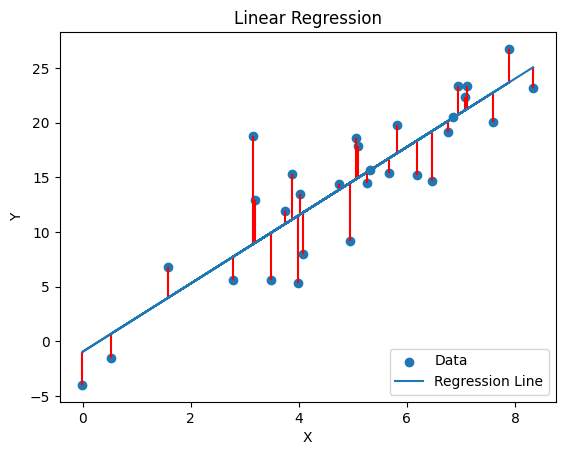

In [ ]:
np.random.seed(102) # Set the seed for the random number generator
N = 30

x = 5 + 2*np.random.normal(0,1,size = N) # Create an x
eps = np.random.normal(0,3,size = N) # Create noise
b0 = -1 # Intercept coefficoent
b1 = 3 # Slope coefficient
y = b0 + b1*x + eps

def slr(x,y): # Single Linear Regression Function
    x_bar = np.mean(x)
    y_bar = np.mean(y)
    b1 = np.inner(x-x_bar,y-y_bar)/np.inner(x-x_bar,x)
    b0 = y_bar - b1*x_bar
    y_hat = b0 + b1*x
    residuals = y - y_hat
    return({'b0':b0,'b1':b1,'y_hat':y_hat,'residuals':residuals})

reg = slr(x,y) # Run the regression
print('Coefficients: ',reg['b0'],reg['b1'])

# Plot the resuts:
for i in range(len(x)):
    plt.vlines(x[i], y[i], reg['y_hat'][i], color='r') # Visualize residuals


plt.scatter(x,y,label='Data')
plt.plot(x,reg['y_hat'],label='Regression Line')
plt.xlabel("X")
plt.ylabel("Y")
plt.legend(loc='lower right')
plt.title('Linear Regression')


,residuals,x
residuals,1.229162e+01,3.570932e-17
x,3.570932e-17,4.362118e+00


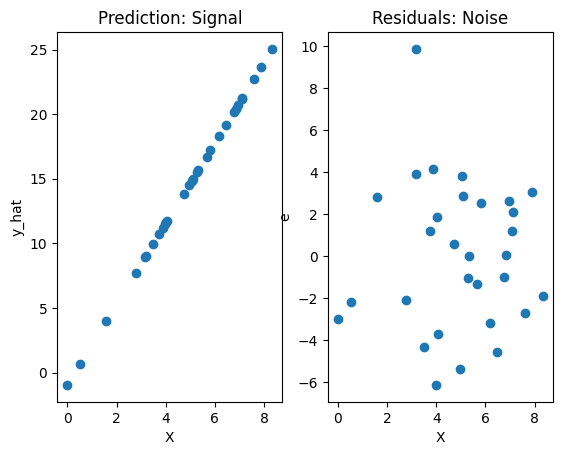

In [ ]:
plt.subplot(1, 2, 1)
plt.scatter(x,reg['y_hat'])
plt.xlabel("X")
plt.ylabel("y_hat")
plt.title('Prediction: Signal')

plt.subplot(1, 2, 2)
plt.scatter(x,reg['residuals'])
plt.xlabel("X")
plt.ylabel("e")
plt.title('Residuals: Noise')

pd.DataFrame({'residuals':reg['residuals'],'x':x}).cov() # Compute correlation between e and x

## Another SLR Example
- Now that we understand SLR a bit better, let's do another case study, of Price versus Mileage

<Axes: >

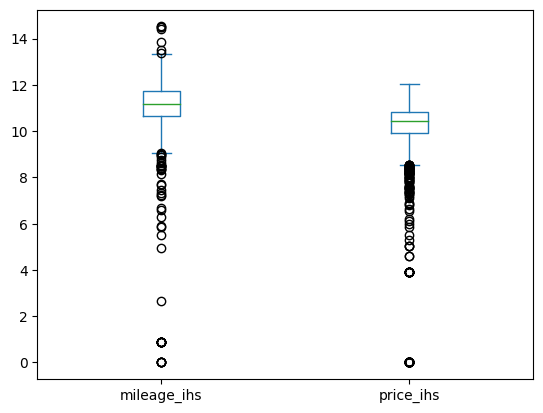

In [ ]:
df = df0 # Let's start over
df['mileage'].describe()
df['mileage_ihs'] = np.arcsinh(df['mileage'])
df['price_ihs'] = np.arcsinh(df['price'])
df.loc[:,['mileage_ihs','price_ihs']].plot.box()

<Axes: xlabel='mileage_ihs', ylabel='price_ihs'>

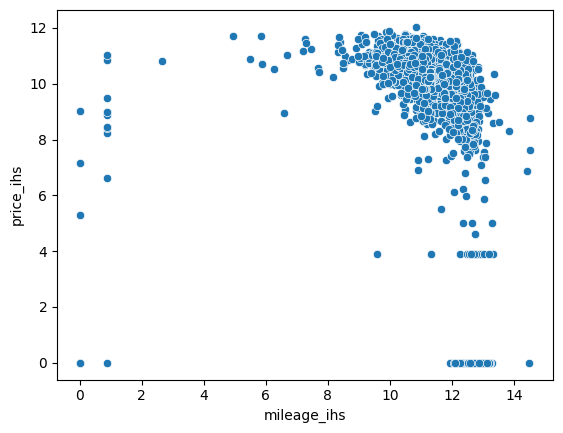

In [ ]:
sns.scatterplot(data=df,y='price_ihs',x='mileage_ihs')

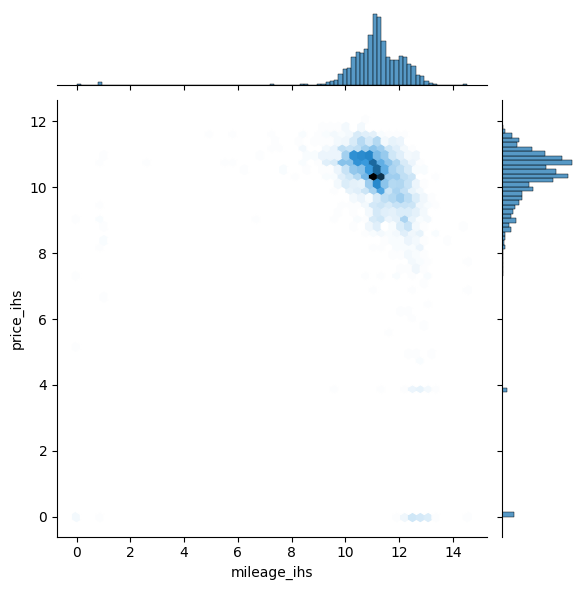

In [ ]:
sns.jointplot(data=df,y='price_ihs',x='mileage_ihs',kind='hex')

In [ ]:
# Drop outliers:
df = df.loc[df['mileage_ihs']>9,:]
df = df.loc[df['mileage_ihs']<13,:]
df = df.loc[df['price_ihs']>9,:]

<Axes: xlabel='price_ihs', ylabel='mileage_ihs'>

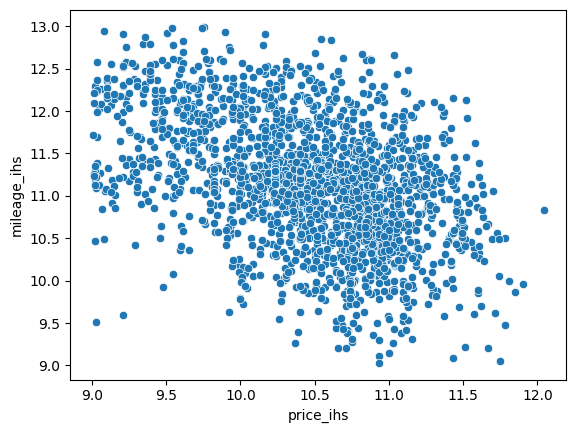

In [ ]:
sns.scatterplot(data=df,x='price_ihs',y='mileage_ihs')

Intercept:  14.458431674413642 
  Slope:  -0.3590238849318658


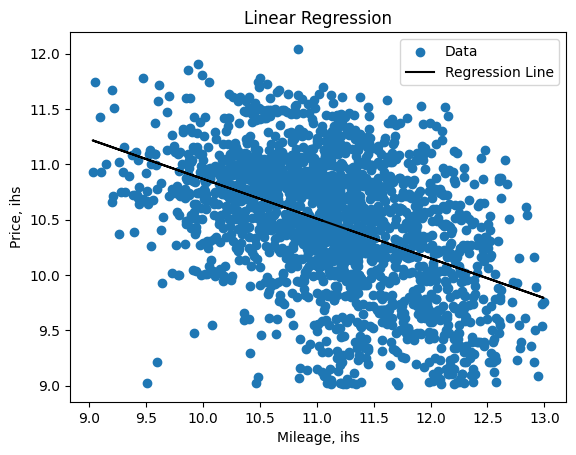

In [ ]:
x = df['mileage_ihs']
y = df['price_ihs']

coef = slr(x,y) # Single Linear Regression
print('Intercept: ',coef['b0'], '\n', ' Slope: ', coef['b1'])

y_hat = coef['b0']+coef['b1']*x # Compute predictions

# Scatter plot of fit:
plt.scatter(x,y,label='Data')
plt.plot(x,y_hat,label='Regression Line',color='black')
plt.xlabel("Mileage, ihs")
plt.ylabel("Price, ihs")
plt.legend(loc='upper right')
plt.title('Linear Regression')

plt.show()

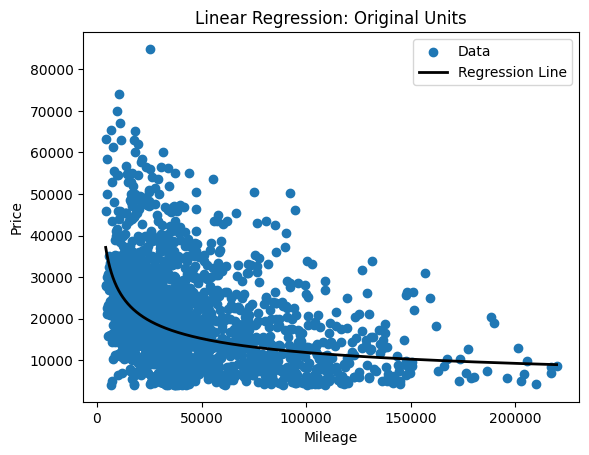

In [ ]:
df.sort_values('mileage',inplace=True) # Sorts the data by age of car

x = df['mileage']
y = df['price']
coef = slr( df['mileage_ihs'], df['price_ihs'])
y_hat = np.sinh(coef['b0']+coef['b1']*df['mileage_ihs']) # sinh is the inverse of arcsinh

plt.scatter(x,y,label='Data')
plt.plot(x,y_hat,label='Regression Line',color='black',linewidth=2)
plt.xlabel("Mileage")
plt.ylabel("Price")
plt.legend(loc='upper right')
plt.title('Linear Regression: Original Units')

plt.show()

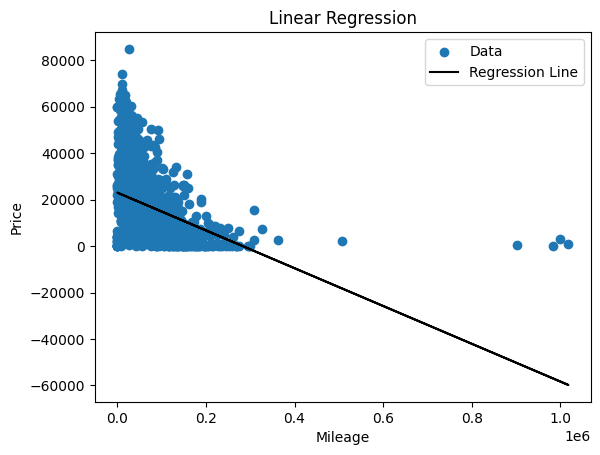

In [ ]:
# Without cleaning/feature engineering:
x = df0['mileage']
y = df0['price']

coef = slr(x,y)

y_hat = coef['b0']+coef['b1']*x

plt.scatter(x,y,label='Data')
plt.plot(x,y_hat,label='Regression Line',color='black')
plt.xlabel("Mileage")
plt.ylabel("Price")
plt.legend(loc='upper right')
plt.title('Linear Regression')
plt.show()

## Multiple Linear Regression
- The previous discussion is great: we have some geometic intuition about how linear regression works, its mathematical foundation, and its key properties
- Problem: It's only worked out for one regressor/feature/explanatory variable
- How do we extend this to multiple variables? i.e., the model
$$ y = \underbrace{b_0}_{\text{Intercept}} \times 1 + b_1 \times  x_1 + b_2 \times x_2 + ... + b_K \times x_K $$
- We adjust the `SSE` to include all the variables of interest:
$$ SSE = \sum_{i=1}^N (y_i - b_0 - b_1 x_{i1} - b_2 x_{i2} - ... - b_K x_{iK} )^2 = \sum_{i=1}^N (y_i - X_i \cdot b)^2$$
and maximize over $(b_0, b_1, ..., b_K)$.
- We won't go over the details analytically, but minimizing $(y-Xb)'(y-Xb)$ can be done computationally (gradient descent) or using linear algebra (the solution is $b^* = (X'X)^{-1}(X'y)$)

---
NO MULTIPLE COLINEARITY
---

## Multiple Linear Regression Example
- Before we looked at `age` and `mileage` separately as predictors of price
- Now that we have MLR, we can combine then into a single model
$$ \text{price} = b_0 + b_{1} \times \text{age} + b_{2}\times\text{mileage}  $$

In [ ]:
# One-step multilinear regression:
def mlr(X,y): # Multiple linear regression, matrix algebra approach
    XpX = X.T@X # Compute X'X
    Xpy = X.T@y # Compute X'y
    b = np.linalg.solve(XpX, Xpy) # Solve normal equations THIS IS THE COOL PART
    y_hat = X@b # Compute predictions
    residuals = y-y_hat # Compute residuals
    SSE =  np.inner(residuals,residuals) # Compute SSE
    rsq = 1 - SSE/np.inner( y-np.mean(y),y-np.mean(y)) # Compute Rsq
    return({'b':b,'y_hat':y_hat,'residuals':residuals,'rsq':rsq,'SSE':SSE})

df['(Intercept)'] = 1
X = df.loc[:,['(Intercept)','age_ihs','mileage_ihs'] ]
y = df['price_ihs']
reg = mlr(X,y)
print('MLR coefficients: ', reg['b']) # Same values!

MLR coefficients:  [13.92816111 -0.10235897 -0.29755968]


## How does MLR work?
- This is the deep idea in regression
- Consider the $x_k$ whose coefficient you want to compute:
    1. Regress $y$ and $x_k$ on all of the other coefficients, yielding residuals $r_y$ and $r_{x_k}$
    2. Now regress $r_y$ on $r_{x_k}$ and a constant
- The slope coefficient for the procedure described above is the same as for MLR
- What does this mean? Linear regression "partials out" all of the variation in $y$ that can be explained by the other features, and the optimal weight $b_k$ reflects only the remaining variation in $y$ that can be explained by $x_k$ alone:
$$
b_k = \dfrac{ \text{cov}(r_y, r_{x_k})}{\sigma^2_{r_{x_k}}}
$$  
- We will return to this idea a lot to explain phenomena related to linear models

---
AVOID MULTIPLE COLINEARITY

In [ ]:
# Let's do all the steps laboriously:

# Pick variables for analysis:
y = df['price_ihs']
x1 = df['mileage_ihs']
x2 = df['age_ihs']

reg1_y = slr(x1,y) # Regress y on x1
reg1_2 = slr(x1,x2) # Regress x2 on x1
y_temp = reg1_y['residuals'] # Extract the residual for y
x2_temp = reg1_2['residuals'] # Extract the residual for x2
reg_y_x2 = slr(x2_temp,y_temp) # Regress residuals on each other
print('Age coefficient: ', reg_y_x2['b1'])

reg2_y = slr(x2,y) # Regress y on x2
reg2_1 = slr(x2,x1) # Regress x1 on x2
y_resid = reg2_y['residuals'] # Extract the residual for y
x1_resid = reg2_1['residuals'] # Extract the residual for x1
reg_y_x1 = slr(x1_resid,y_resid) # Regress residuals on each other
print('Mileage coefficient: ', reg_y_x1['b1'])

# Compute intercept:
b0 = np.mean(y) - reg_y_x1['b1'] * np.mean(x1) - reg_y_x2['b1']*np.mean(x2)
print('Intercept: ', b0, '\n')

Age coefficient:  -0.10235896510249802
Mileage coefficient:  -0.29755967901120933
Intercept:  13.928161108815134 



## Multiple Linear Regression
- Once you have multiple linear regression, you can build much more complex models of phenomena
- We probably want to include $\text{age}^2$ and $\text{mileage}^2$ to control for non-linear aging effects:
$$ \text{price} = b_0 + b_{1} \times \text{age} + b_{2} \times\text{age}^2 + b_{3}\times\text{mileage} + b_{4}\times\text{mileage}^2 $$
- This gives a highly flexible and extensible way of modeling how features predict a target variable; you can only unlock the power of linear regression if you are willing to give it a large feature space to work with
- Eventually, we want to discipline this process by using data, not just making up models that run the risk of overfitting our data

In [ ]:
df.head()

,Unnamed: 0,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition,age,price_ihs,age_ihs,mileage_ihs,(Intercept)
2002,2002,27995,ford,doors,2018,clean vehicle,4181,gray,1fa6p8cf9j5120362,167654228,pennsylvania,usa,11 days left,2,10.932928,1.443635,9.031453,1
667,667,63200,chevrolet,corvette,2016,clean vehicle,4266,red,1g1ys2d6xg5609979,167783470,california,usa,2 days left,4,11.747207,2.094713,9.051579,1
646,646,46000,chevrolet,corvette,2016,clean vehicle,4445,black,1g1yj2d70g5122320,167780138,illinois,usa,2 days left,4,11.429544,2.094713,9.092682,1
2000,2000,27990,ford,doors,2018,clean vehicle,4512,ingot silver metallic,1fa6p8cf0j5159227,167654227,new york,usa,11 days left,2,10.932750,1.443635,9.107643,1
2004,2004,29988,ford,doors,2018,clean vehicle,4712,ingot silver metallic,1fa6p8cf5j5125462,167654229,pennsylvania,usa,11 days left,2,11.001700,1.443635,9.151015,1


In [ ]:
y = df['price_ihs']
df['mileage_ihs_sq'] = df['mileage_ihs']**2
df['age_ihs_sq'] = df['age_ihs']**2
df['(Intercept)'] = 1
vars = ['(Intercept)','mileage_ihs','mileage_ihs_sq','age_ihs','age_ihs_sq']
X = df.loc[:,vars]
X.head()

,(Intercept),mileage_ihs,mileage_ihs_sq,age_ihs,age_ihs_sq
2002,1,9.031453,81.567142,1.443635,2.084083
667,1,9.051579,81.931084,2.094713,4.387821
646,1,9.092682,82.676872,2.094713,4.387821
2000,1,9.107643,82.949161,1.443635,2.084083
2004,1,9.151015,83.741074,1.443635,2.084083


[ 8.88250031e+00  6.17578937e-01 -4.16613623e-02 -6.20084626e-02
 -6.82521387e-03]
0.21015299607906412


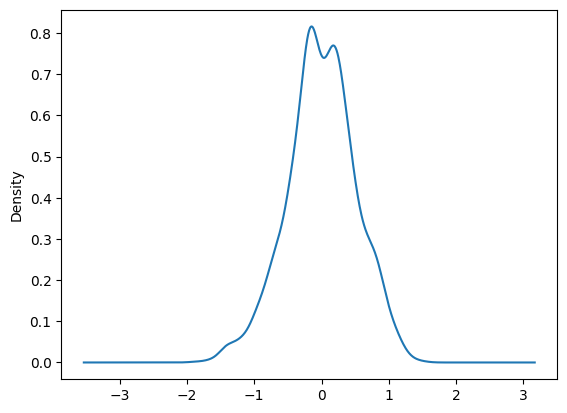

In [ ]:
reg = mlr(X,y) # Run multiple linear regression
print(reg['b']) # Print coefficients
reg['residuals'].plot.kde() # Plot residuals
print(reg['rsq']) # R-squared measure of model fit

## The `sklearn.linear_model` Module
- Scikit-Learn has a linear regression object that can be used out-of-the box:
    - `from sklearn.linear_model import LinearRegression` to load the linear regression module
    - `myRegression = LinearRegression().fit(X, y)` fits
- You'll see below that the results very similar to the `mlr` function above: They're using the same NumPy code "under the hood" to solve for the OLS coefficients, but with some additional feature engineering/normalization

In [ ]:
from sklearn.linear_model import LinearRegression # Import linear regression model

vars = ['mileage_ihs','mileage_ihs_sq','age_ihs','age_ihs_sq'] # This is a list of variables to use

X = df.loc[:,vars] # Construct data matrix
X.head() # Peek at data

,mileage_ihs,mileage_ihs_sq,age_ihs,age_ihs_sq
2002,9.031453,81.567142,1.443635,2.084083
667,9.051579,81.931084,2.094713,4.387821
646,9.092682,82.676872,2.094713,4.387821
2000,9.107643,82.949161,1.443635,2.084083
2004,9.151015,83.741074,1.443635,2.084083


In [ ]:
reg = LinearRegression().fit(X, y) # Fit the linear model
print(reg.intercept_) # Intercept value
print(reg.coef_) # Regression coefficients
print(reg.score(X, y)) # R squared measure

8.882500310302532
[ 0.61757894 -0.04166136 -0.06200846 -0.00682521]
0.21015299607906424


## Examples
- `./data/USA_cars_datasets.csv`
- `./data/airbnb_hw.csv`
- `./data/heart_failure/heart_failure_clinical_records_dataset.csv`
- `./data/pierce_county_house_sales.csv`

## Coefficient of Determination, $R^2$
- A natural question then is, how much noise is left to explain? How well does the model fit the data?
- There is a common statistic used to summarize how predictive $X$ is of $y$, using the OLS coefficients, called the *coefficient of determination* or $R^2$:
$$
R^2 = 1 - \dfrac{\sum_{i=1}^N (y_i - x_i \cdot \hat{b})^2}{\sum_{i=1}^N(y_i-\bar{y})^2}
$$
- That numerator is the sum-of-squared-error, evaluated at $\hat{b}$: How much error remains after trying to explain it using OLS?
- That denominator is the error of predicting $y_i$ with just the mean as the predictor, $\bar{y}$
- So the ratio is the reduction in the `SSE` by using the explanatory variables rather than just the sample mean
- This is a nice way to evaluate the model, but should not become an end in itself: Adding more variables always raises the $R^2$, but does not necessarily improve out-of-sample prediction
- $R^2$ isn't an end in itself

## What, exactly, makes a model linear?
- A model is linear because the coefficients, $b$, enter the prediction as
$$
\hat{y} = b \cdot \hat{x} = b_1 \hat{x}_1 + b_2 \hat{x}_2 + ... b_J \hat{x}_J
$$
so that the relationship between $\hat{y}$ and each $\hat{x}_j$ is a linear one through $b_j$
- Taking non-linear transformations of the $x_j$'s simply gives new variables, like $\log(x_j)$ or $x_j^2$ -- *Transformations of the regressors don't make the model nonlinear*
- Likewise, if there was a coefficient written in a funky nonlinear way, like $\sqrt{ \text{asinh}(b_j)}$, you can simply relabel that coefficient as $b_j \leftarrow \sqrt{ \text{asinh}(b_j)}$ and make the model linear again.
- There *are* many interesting non-linear models, but they are often derived from a domain-specific theory and require additional work to understand

## Beyond Fitting the Model
- Up to here, the discussion has been a standard analysis of linear models
- From the perspective of data science, we have **model specification** questions: What variables should go in the model?
- The power of linear models is that you can interact variables and expand the feature space, allowing you to better control how relationships between variables are modelled
- The risk is that your model turns to mush (multicolinearity)

## Expanding the Feature Space
- To fully leverage the power of regression, you have many options to expand the range of variables that the model can use to explain the variation in the data:
    - An **interaction term** is when you take two explanatory variables, say $x_1$ and $x_2$, and multiply them together to get a new explanatory variable, $z = x_1 x_2$, like $\text{mileage} \times \text{age}$
    - A **polynomial family** is when you take an explanatory variable, say $x$, and compute its powers $x^2$, $x^3$, ... , $x^K$. (There are many kinds of families besides polynomial.)
    - A **logarithmic transformation** or **inverse hyperbolic sine transformation**
    - A **maxmin normalization** or **z-score normalization**
    - More advanced tools like **principal components analysis** decomposition of the data or **splines** that create highly transformations of variables
    - Any combination of the above
- This is where we run into a significant danger of overfitting: The more complex the feature space, the more opportunities we give the model to pick non-representative cases around which to build non-representative/externally invalid models
- You can do a lot of these by hand, using `df['new_var'] = transformation(df['old_var'])`, but many common and tedious transformations are already programmed in sklearn

## Quick Polynomial and Interaction Features/Variables
- It it tedious to compute interaction terms like $x_1 \times x_2$ or $x^2, x^3, ..., x^m$ on your own, and it's a very common task, so `sklearn` has a convenient tool for accomplishing this
- The `PolynomialFeatures` is the object in `sklearn.preprocessing` that can quickly create matrices of exponenetiated variables for you without doing it yourself
- The basic steps are:
    1. Import the object: `from sklearn.preprocessing import PolynomialFeatures`
    2. Decide the degree of the expansion and create an expander: `expander = PolynomialFeatures(degree=2,include_bias=False)`
    3. Execute the transformations: `Z = expander.fit_transform(X)` and get labels for the columns `names = expander.get_feature_names_out()`
    4. Create a new dataframe: `zdf = pd.DataFrame(data=Z, columns = names)`
    5. Possibly concatenate this new dataframe with other data
- Use this power wisely

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
# Example dataframe:
df = pd.DataFrame({'apples':np.array([1,3,5]),'joules':np.array([3,-2,1]), 'stocks':np.array([-2,1,4])})
X = df
X.head()

,apples,joules,stocks
0,1,3,-2
1,3,-2,1
2,5,1,4


In [ ]:
expander = PolynomialFeatures(degree=2,include_bias=False) # Create the expander
Z = expander.fit_transform(X) # Pass the df into the expander to get powers/interactions of x and y
names = expander.get_feature_names_out() # Get the names of these variables
zdf = pd.DataFrame(data=Z, columns = names) # Create a new, expanded dataframe
zdf.head()

,apples,joules,stocks,apples^2,apples joules,apples stocks,joules^2,joules stocks,stocks^2
0,1.0,3.0,-2.0,1.0,3.0,-2.0,9.0,-6.0,4.0
1,3.0,-2.0,1.0,9.0,-6.0,3.0,4.0,-2.0,1.0
2,5.0,1.0,4.0,25.0,5.0,20.0,1.0,4.0,16.0


In [ ]:
## Compute all polynomials up to degree 3:
expander = PolynomialFeatures(degree=3,include_bias=False) # Create the expander
Z = expander.fit_transform(X) # Pass the df into the expander to get powers/interactions of x and y
names = expander.get_feature_names_out() # Get the names of these variables
zdf = pd.DataFrame(data=Z, columns = names) # Create a new, expanded dataframe
zdf.head()

,apples,joules,stocks,apples^2,apples joules,apples stocks,joules^2,joules stocks,stocks^2,apples^3,apples^2 joules,apples^2 stocks,apples joules^2,apples joules stocks,apples stocks^2,joules^3,joules^2 stocks,joules stocks^2,stocks^3
0,1.0,3.0,-2.0,1.0,3.0,-2.0,9.0,-6.0,4.0,1.0,3.0,-2.0,9.0,-6.0,4.0,27.0,-18.0,12.0,-8.0
1,3.0,-2.0,1.0,9.0,-6.0,3.0,4.0,-2.0,1.0,27.0,-18.0,9.0,12.0,-6.0,3.0,-8.0,4.0,-2.0,1.0
2,5.0,1.0,4.0,25.0,5.0,20.0,1.0,4.0,16.0,125.0,25.0,100.0,5.0,20.0,80.0,1.0,4.0,16.0,64.0


---

Worried about overfitting here!

---

In [ ]:
## Only compute the interactions up to degree 3:
expander = PolynomialFeatures(degree=3,interaction_only=True,include_bias=False) # Create the expander
Z = expander.fit_transform(X) # Pass the df into the expander to get powers/interactions of x and y
names = expander.get_feature_names_out() # Get the names of these variables
zdf = pd.DataFrame(data=Z, columns = names) # Create a new, expanded dataframe
zdf.head()

,apples,joules,stocks,apples joules,apples stocks,joules stocks,apples joules stocks
0,1.0,3.0,-2.0,3.0,-2.0,-6.0,-6.0
1,3.0,-2.0,1.0,-6.0,3.0,-2.0,-6.0
2,5.0,1.0,4.0,5.0,20.0,4.0,20.0


## Quick One Hot Encoding
- We often have categorical data that need to be converted to numerical values for `sklearn` to work
- You can use Pandas to create dummy variables out of the categorical variable using `pd.get_dummies(varName)`
- You can use sklearn's `LabelBinarizer` from `.preprocessing` to create a matrix of one-hot encoded variables (the `OneHotEncoder` can be more complex to use)
- **We rarely interact put one-hot variables into the polynomial feature expander, unless it's a thing we've explicitly decided to do**

In [ ]:
df = pd.DataFrame({'apples':np.array([1,3,5,7]),
                   'joules':np.array([3,-2,1,2]),
                   'stocks':np.array([-2,1,4,6]),
                   'bird':['Cardinal','Oriole','Robin','Oriole']})
X = df
X.head()

,apples,joules,stocks,bird
0,1,3,-2,Cardinal
1,3,-2,1,Oriole
2,5,1,4,Robin
3,7,2,6,Oriole


In [ ]:
# With Pandas:
ddf = pd.get_dummies(X['bird'])
ddf.head()

,Cardinal,Oriole,Robin
0,True,False,False
1,False,True,False
2,False,False,True
3,False,True,False


In [ ]:
# With Pandas, if you don't like booleans:
ddf = pd.get_dummies(X['bird'],dtype='int')
ddf.head()

,Cardinal,Oriole,Robin
0,1,0,0
1,0,1,0
2,0,0,1
3,0,1,0


In [ ]:
# With sklearn:
from sklearn.preprocessing import LabelBinarizer

one_hot_encoder = LabelBinarizer()
oh = one_hot_encoder.fit_transform(X['bird']) # One-hot encode the 'bird' variable
print(oh)
names = one_hot_encoder.classes_ # Get names of the classes
print(names)

zdf = pd.DataFrame( data = oh, columns = names) # Create a new df for the encoded variables
zdf.head()

[[1 0 0]
 [0 1 0]
 [0 0 1]
 [0 1 0]]
['Cardinal' 'Oriole' 'Robin']


,Cardinal,Oriole,Robin
0,1,0,0
1,0,1,0
2,0,0,1
3,0,1,0


## The Dummy Variable Trap
- When running linear regression with dummy variables, you have two choices:
    - For each dummy variable, use the `pd.get_dummies(..., drop_constant=True)`, and keep the intercept in the regression
    - Drop the intercept of the regression with the option `LinearRegression(fit_intercept=False).fit(X, y)`, but keep all the dummies
- The reason this occurs is that if you have an intercept and all of the dummies, you can replicate one of your regressors from a combination of other ones. This is called **perfect multicolinearity**, and some of your coefficents won't be defined
- Most stats packages hide this in the background of the regression, but you have to handle it with pandas/sklearn more explicitly

## Quickly Concatenating Dataframes
- OK, you made these nice shiny features, how do you get them back into a single dataframe?
- The `df = pd.concat([df1,df2,...,dfk],axis=1)` makes a new dataframe out of the columns of the original dataframes `df1`, `df2`, ..., `dfk`
- So you can build all the transformed data frames you want, then collapse them all back into one dataframe for processing
- Since you are going to do this, you might want to think carefully about how you're building the dataframe chunks, and use `.iloc` or `.loc` to be selective about what going into each one

In [ ]:
## Polynomial features:
expander = PolynomialFeatures(degree=2,include_bias=False) # Create the expander
Z = expander.fit_transform(df.iloc[:,1:3]) # Pass the df into the expander to get powers/interactions of x and y
names = expander.get_feature_names_out() # Get the names of these variables
X1 = pd.DataFrame(data=Z, columns = names) # Create a new, expanded dataframe

## Dummy variables:
X2 = pd.get_dummies(df['bird'], dtype=float) # Create dummies

## Concatenate:
X = pd.concat([X1,X2],axis=1) # Concatenate engineered features
X.head()

,joules,stocks,joules^2,joules stocks,stocks^2,Cardinal,Oriole,Robin
0,3.0,-2.0,9.0,-6.0,4.0,1.0,0.0,0.0
1,-2.0,1.0,4.0,-2.0,1.0,0.0,1.0,0.0
2,1.0,4.0,1.0,4.0,16.0,0.0,0.0,1.0
3,2.0,6.0,4.0,12.0,36.0,0.0,1.0,0.0


## Quickly Handling Outliers
- We have the sense that outliers are bad, particularly for global smoothers like linear regression
- We want to (1) detect outliers, (2) create an outlier dummy, and (3) **windsorize** them: Replace values outside the whiskers with the min/max values of the whiskers (when you remove outliers altogether, it is called **trimming**)
- This is, again, a quick way of processing outliers without losing data

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<Axes: >

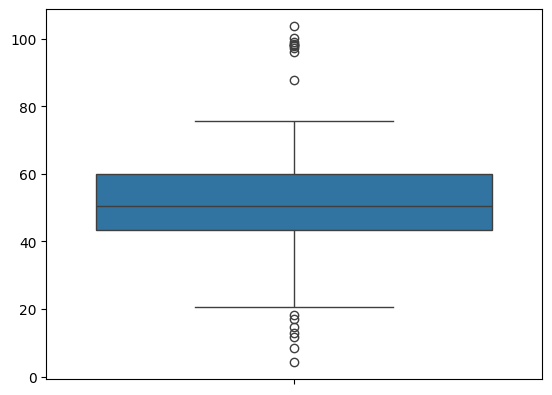

In [ ]:
## Generate random data with outliers
np.random.seed(1000)
N = 200
switch = np.random.uniform(0,1,N)
x = (switch<.05)*np.random.normal(20,10,N)+(switch >= .05)*(switch<.95)*np.random.normal(50,10,N)+(switch>=.95)*np.random.normal(100,5,N)
sns.boxplot(x)

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<Axes: >

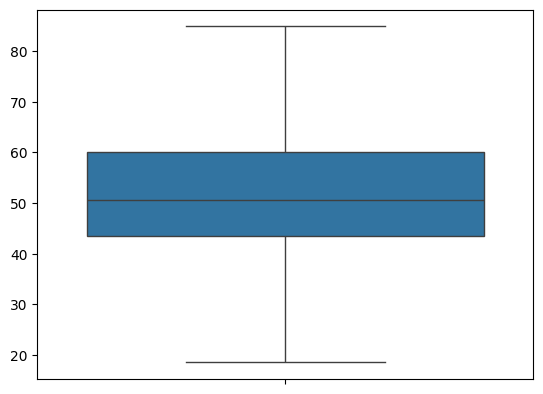

In [ ]:
## Function to Windsorize a variable:
def winsorize(x):
    # Convert from pd to np, if necessary:
    if type(x) == 'pandas.core.series.Series':
        x = x.to_numpy()
    # Compute IQR and 25, 75 quantiles:
    pct25, pct75 = np.percentile(x,[25,75])
    iqr = pct75 - pct25
    # Compute whiskers:
    lower_whisker = pct25 - iqr*1.5
    upper_whisker = pct75 + iqr*1.5
    # Windorize x:
    x_winsor = np.copy(x)
    x_winsor[ x < lower_whisker ] = lower_whisker
    x_winsor[ x > upper_whisker ] = upper_whisker
    return(x_winsor)

sns.boxplot( winsorize(x))

## Cars, Again
- Let's build some simple models to predict car prices that aren't constrained by our earlier concerns

In [ ]:
df = df0 # Let's start over, again
df.head() # Glance at the data

,Unnamed: 0,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition,age,price_ihs,age_ihs,mileage_ihs
0,0,6300,toyota,cruiser,2008,clean vehicle,274117,black,jtezu11f88k007763,159348797,new jersey,usa,10 days left,12,9.441452,3.179785,13.214457
1,1,2899,ford,se,2011,clean vehicle,190552,silver,2fmdk3gc4bbb02217,166951262,tennessee,usa,6 days left,9,8.665268,2.893444,12.850828
2,2,5350,dodge,mpv,2018,clean vehicle,39590,silver,3c4pdcgg5jt346413,167655728,georgia,usa,2 days left,2,9.277999,1.443635,11.279479
3,3,25000,ford,door,2014,clean vehicle,64146,blue,1ftfw1et4efc23745,167753855,virginia,usa,22 hours left,6,10.819778,2.491780,11.762064
4,4,27700,chevrolet,1500,2018,clean vehicle,6654,red,3gcpcrec2jg473991,167763266,florida,usa,22 hours left,2,10.922335,1.443635,9.496121


In [ ]:
## Simple regression on brand dummies:

# Target Variable
y = df['price']

# Brand Dummy:
X_d = pd.get_dummies(df['brand'],dtype='int') # Create brand dummies

# Regresion:
from sklearn.linear_model import LinearRegression # Import linear regression model
reg = LinearRegression(fit_intercept=False).fit(X_d, y) # Fit the linear model
results = pd.DataFrame({'variable':reg.feature_names_in_, 'coefficient': reg.coef_}) # Regression coefficients
print('R-squared: ', reg.score(X_d, y)) # R squared measure
results

R-squared:  0.12030739559992254


,variable,coefficient
0,acura,7266.666667
1,audi,13981.250000
2,bmw,26397.058824
3,buick,19715.769231
4,cadillac,24941.000000
5,chevrolet,18669.952862
6,chrysler,13686.111111
7,dodge,17781.988426
8,ford,21666.888259
9,gmc,10657.380952


,mileage_ihs,acura,audi,bmw,buick,cadillac,chevrolet,chrysler,dodge,ford,...,land,lexus,lincoln,maserati,mazda,mercedes-benz,nissan,peterbilt,ram,toyota
0,13.214457,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,12.850828,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,11.279479,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,11.762064,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,9.496121,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


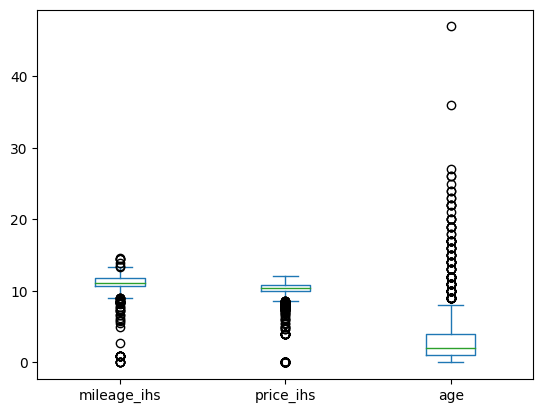

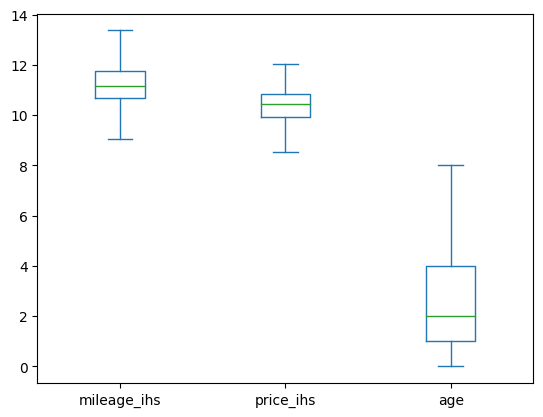

In [ ]:
## More complex regression on brand and numeric values:

# Target Variable
y = df['price_ihs']

# Initial boxplot:
df.loc[:,['mileage_ihs','price_ihs','age']].plot.box()

# Winsorize using .apply:
df.loc[:, ['mileage_ihs','price_ihs','age'] ] = df.loc[:,['mileage_ihs','price_ihs','age'] ].apply(winsorize)

# Final boxplot:
df.loc[:,['mileage_ihs','price_ihs','age']].plot.box()

# Expand numeric variables:
expander = PolynomialFeatures(degree=1,include_bias=False) # Create the expander
X_num = df.loc[:,['mileage_ihs']]
Z = expander.fit_transform(X_num) # Pass the df into the expander to get powers/interactions of x and y
names = expander.get_feature_names_out() # Get the names of these variables
X_num = pd.DataFrame(data=Z, columns = names) # Create a new, expanded dataframe

# Concatenate
X = pd.concat( [X_num, X_d],axis=1)
X.head()

In [ ]:
from sklearn.linear_model import LinearRegression # Import linear regression model
reg = LinearRegression(fit_intercept=False).fit(X, y) # Fit the linear model
results = pd.DataFrame({'variable':reg.feature_names_in_, 'coefficient': reg.coef_}) # Regression coefficients
print('R-squared: ', reg.score(X, y)) # R squared measure
results

R-squared:  0.39536091971260845


,variable,coefficient
0,mileage_ihs,-0.499900
1,acura,15.463345
2,audi,15.816689
3,bmw,16.094315
4,buick,15.946957
5,cadillac,16.213362
6,chevrolet,15.977385
7,chrysler,15.649452
8,dodge,15.856337
9,ford,16.036613


<Axes: xlabel='price_ihs', ylabel='Density'>

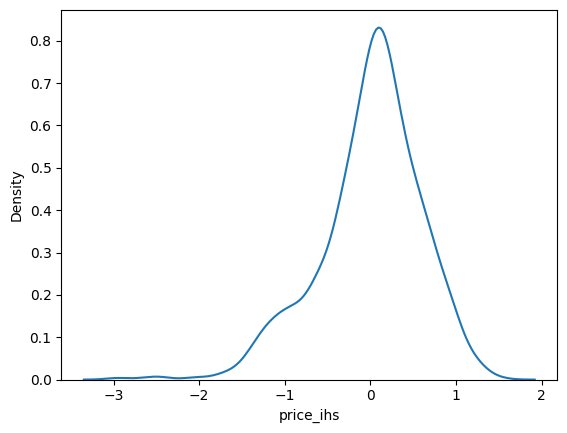

In [ ]:
sns.kdeplot(df['price_ihs'] -reg.predict(X) ) # Residual plot

## Model Selection
- Datasets often have dozens or thousands of variables, and we can create many more through transforming and interacting variables. Which variables go into a linear regression?
- In linear regression, our model is **underfit** if we use too few variables which cannot capture the complex relationships between the features and target variable, while our model is **overfit** if we are using too many variables which are exploiting too many unique features of the training data
- In statistics, it is an assumption that the analyst roughly knows the "true" data generating process, and properties of an estimator are derived under that assumption - statistics has few useful answers for how to pick the form of the model itself (e.g. Akaike Information Criterion, Bayesian Information Criterion, Mallows' $C_p$)
- In machine learning, we will learn some tools and techniques for model selection in a data-driven way later on in the course based on cross validation (e.g. LASSO)

## The Classical Assumptions for OLS [stats]
- I often see people write the following: "The neccessary assumptions for linear regression are (i) linearity, (ii) homoskedasticity, (iii) conditional independence of errors, (iv) normality of errors"
- This generates confusion --- These are the assumptions for *OLS to be the best, linear, unbiased estimator (BLUE) of a hypothetical "true" $b_0$ in a finite sample, and the $z$-test to be correctly specified*
- We are not trying to estimate $b_0$, we are trying to do something else: find the *best linear predictor* of $y$ using the variables $X$. The above conditions are not necessary for that.
- You don't need permission to run OLS and make predictions, you need permission to run OLS and interpret the coefficients.

## General Linear Models
- You can spend the rest of your life studying linear models and their generalizations
- In many situations, there are additional restrictions on the environment that cannot always be satisfied by a linear model
    - The outcome/target variable might be a binary 0/1 outcome, so we are predicting the probability of something occuring. OLS might predict values less than zero or greater than one. Popular solutions are **Logit regression** or **Probit regression**
    - The outcome/target variable might be a non-negative integer, meaning that it is **count data**, like the number of earthquakes or cases of an illness. OLS won't predict counts. Popular solutions are **Poisson regression** or **negative binomial regression**.
- In these cases, we can estimate alternative models that impose restrictions on the outcome of the linear model, typically through maximum likelihood estimation or generalized linear modeling
- These aren't typically much more work to estimate, but we don't really have the time to cover all the nuances (and people typically estimate them only if the OLS model really breaks down in terms of predictive performance)